# SI 618 - Homework #1: Data Manipulation

Version 2023.09.06.01.CT (Fall 2023)

## Background

This homework assignment focuses on the analysis of biometric data and exercise performance.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class*, as well as those in the assigned readings and video resources.  You may need to consult pandas documentation, Stack Overflow, Copilot, or other online resources.  


A total of 100 points is available in this homework assignment, broken down as shown beside each question and in the accompanying rubric in Canvas.  Please note that to receive full points, code should conform to  [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines, and written responses should be grammatically correct, free of spelling errors, and generally follow the [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view) guidelines.  You should review those guidelines before proceding with the assignment.

## Download the data from: 
https://www.kaggle.com/kukuroo3/body-performance-data


In [2]:
MY_UNIQNAME = 'mattcalc' # please fill in your uniqname

## Answer the following questions.
Points for each question are shown below.

For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).  When we ask for an explanation of your answer, we are interested in your interpretation of the analyses that you produce.  With the exception of Question 1a, we are not interested in a description of the steps you took to arrive at your answer.

### <span style="color:magenta"> Q1: 8 pt(total):</span>
#### Q1a (3pt): Write out the steps you need to follow in order to describe the dataset, in terms of size, number of rows, and number of columns.



### Steps needed:
1. Load pandas
1. Read the dataset into pandas dataframe
1. The property `.columns` can be used to determine the number of columns
1. The property `.rows` can be used to determine the number of rows
    * alternatively the property `.shape` can be used to return both the number of rows and the number of columns

#### Q1b (5pt): Write and execute the code that will do the steps you identified in Part (a) of this question.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


body_df = pd.read_csv('../data/bodyPerformance.csv')
body_df.shape
print(f'The dataset has {body_df.shape[0]} rows and {body_df.shape[1]} columns')


The dataset has 13393 rows and 12 columns


We start by loading pandas into python, then we load our dataset into a pandas dataframe. We then use `.shape` to retrieve a tuple containg the number of rows and columns.

This data set has 13393 rows and 12 columns.

### <span style="color:magenta">Q2: 5 pt:</span>
Without using pd.DataFrame.describe(), report the median age, height, and weight for people in the data. Round your answer to the nearest whole number.  Be sure to indicate units for each variable in your write-up.

In [4]:
median_age = body_df['age'].median()
median_height = body_df['height_cm'].median()
median_weight = body_df['weight_kg'].median()

print(f'The median age is {median_age:.0f} years old')
print(f'The median height is {median_height} cm') 
print(f'The median weight is {median_weight} kg')

The median age is 32 years old
The median height is 169.2 cm
The median weight is 67.4 kg


We can use the method `.median()` to find the median of a specific column. We selected the column by using `df['column_name']` notation and passing the results to the `.median(method)`

- The median age is 32 years old
- The median height is 169.2 cm
- The median weight is 67.4 kg


### <span style="color:magenta">Q3: 5 pt: </span>
Look for any anomalous data points.  For example, are there cases where diastolic blood pressure is higher than systolic blood pressure (which is physiologically impossible)?  Do you notice any other anomalies?

In [5]:
body_df[body_df.diastolic > body_df.systolic]


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
7495,30.0,F,156.2,52.80,28.2,156.2,104.0,21.7,27.2,43.0,162.0,C
7597,30.0,M,166.6,66.08,14.4,67.0,14.0,53.8,17.2,57.0,221.0,A
8217,31.0,M,176.7,80.32,20.8,46.2,43.9,43.9,17.2,57.0,221.0,B
12949,24.0,M,171.0,78.70,20.0,99.0,95.0,46.5,12.8,50.0,197.0,D


We can apply a boolean mask to our dataframe which only returns the rows of the datafram where the diatolic blood pressure is greater than systolic blood pressure

There are 4 rows which have a diastolic blood pressure which is greater than the systolic blood pressure.
- 7495
- 7597
- 8217
- 12949

Looking through the other columns in the data I do not notice any other anomolies

### <span style="color:magenta">Q4: 11 pt:</span>
Generate histogram plots for the age, weight, and height for that allow you to visualize differences between gender M and gender F participants. Describe the plots and point out any interesting aspects. You are not permitted to use Seaborn, Bokeh, or Plotly to create your visualizations (i.e. you can only use the matplotlib-pandas integrations).

array([<Axes: title={'center': 'F'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

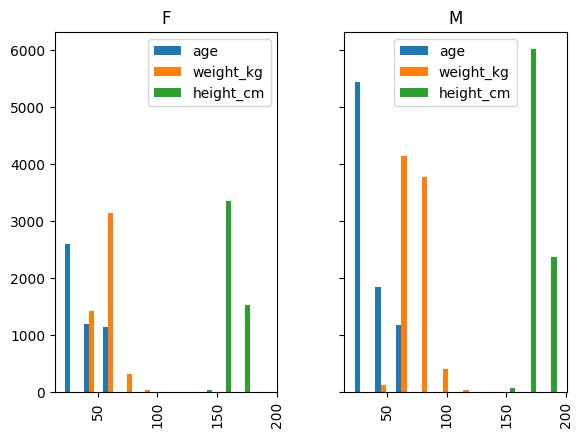

In [30]:
body_df_gender = body_df.groupby('gender')

body_df.hist(column=['age', 'weight_kg', 'height_cm'], by='gender', legend=True, sharex=True, sharey=True)


Based on the histograms we can see that the males in the data set had a higher median height and weight.

Another point of interest from the graphs is that the males have a slightly greater skew in the distribution of weight.

### <span style="color:magenta">Q5: 16 pt:</span>
[Blood pressure](https://www.health.harvard.edu/heart-health/reading-the-new-blood-pressure-guidelines) is reported as two numbers: diastolic (the lower number) and systolic (the higher number).  So, for example, if a person has a diastolic measurement of 80 and a systolic measurement of 120, the person's blood pressure would be reported as 120/80.

Blood pressure measurements fall into several categories:

Normal blood pressure. Your blood pressure is normal if it's below 120/80 mm Hg.

Elevated blood pressure. Elevated blood pressure is a systolic pressure ranging from 120 to 129 mm Hg and a diastolic pressure below (not above) 80 mm Hg. Elevated blood pressure may also be called prehypertension.

Stage 1 hypertension. Stage 1 hypertension is a systolic pressure ranging from 130 to 139 mm Hg or a diastolic pressure ranging from 80 to 89 mm Hg.

Stage 2 hypertension. More-severe hypertension, stage 2 hypertension is a systolic pressure of 140 mm Hg or higher or a diastolic pressure of 90 mm Hg or higher.

Hypertensive crisis. A blood pressure measurement higher than 180/120 mm Hg is an emergency situation that requires urgent medical care.

a) Report the number of people in each of those categories.

b) The guidelines were recently changed: prior to 2017, the guidelines set the threshold at 140/90 mm Hg for people younger than age 65 and 150/80 mm Hg for those ages 65 and older to be diagnosed with hypertension. Create and implement analyses that allow you to demonstrate how the change in guidelines affects the categorization of people into the different categories.
Make reasonable assumptions (and state them) about whether to use diastolic, systolic, both, or either of those measures when implementing your analysis.  Note that the new guidelines offer more categories than the older guidelines.

In [7]:
normal_bp = body_df[(body_df.diastolic < 80) & (body_df.systolic < 120)]
elevated_bp = body_df[(body_df.diastolic < 80) & (body_df.systolic >= 120) & (body_df.systolic <= 129)]
stage1_hypertension = body_df[(body_df.diastolic >= 80) & (body_df.diastolic <= 89) | (body_df.systolic >= 130) & (body_df.systolic <= 139)]
stage2_hypertension = body_df[(body_df.diastolic >= 90) | (body_df.systolic >= 140)]
Hypertensive_crisis = body_df[(body_df.diastolic > 120) & (body_df.systolic > 180)]


print(f'The number of people with normal blood pressure is {normal_bp.shape[0]}')
print(f'The number of people with elevated blood pressure is {elevated_bp.shape[0]}')
print(f'The number of people with stage 1 hypertension is {stage1_hypertension.shape[0]}')
print(f'The number of people with stage 2 hypertension is {stage2_hypertension.shape[0]}')
print(f'The number of people with hypertensive crisis is {Hypertensive_crisis.shape[0]}')


hypertension_2017 = body_df[((body_df.diastolic >= 90) & (body_df.systolic >= 140) & (body_df.age < 65)) | ((body_df.systolic >= 150) & (body_df.age >= 65) & (body_df.diastolic >= 80))]
print()
print(f'The number of people with hypertension prior to 2017 is {hypertension_2017.shape[0]}')
print(f'The number of people with stage 1 or stage 2 hypertension post-2017 was {stage1_hypertension.shape[0] + stage2_hypertension.shape[0]}')
print(f'The number of people classified as hypertensive changed by {(stage1_hypertension.shape[0] + stage2_hypertension.shape[0]) - hypertension_2017.shape[0]} following the 2017 guideline changes')

The number of people with normal blood pressure is 2898
The number of people with elevated blood pressure is 2090
The number of people with stage 1 hypertension is 5936
The number of people with stage 2 hypertension is 4418
The number of people with hypertensive crisis is 1

The number of people with hypertension prior to 2017 is 1689
The number of people with stage 1 or stage 2 hypertension post-2017 was 10354
The number of people classified as hypertensive changed by 8665 following the 2017 guideline changes


The number of people with normal blood pressure is 2898
The number of people with elevated blood pressure is 2090
The number of people with stage 1 hypertension is 5936
The number of people with stage 2 hypertension is 4418
The number of people with hypertensive crisis is 1

The number of people with hypertension prior to 2017 is 1689
The number of people with stage 1 or stage 2 hypertension post-2017 was 10354
The number of people classified as hypertensive changed by 8665 following the 2017 guideline changes

The changes in the guidlines in 2017 lead to the increase in those classified with hypertension by just under 9000 in this dataset. For the calculations under the old guidelines it was assumed that you fell into the hypertensive category if you exceeded both the systolic and diastolic blood pressure threshold. This may contribute to the lower number of hypertensive patient found using the pre-2017 guidelines.


### <span style="color:magenta">Q6: 10 pt:</span>
Create a new variable "age_class" that is "early" if age < 40, "middle" if age is between 40 and 60 (inclusive) and "late" if age > 60.  Report the mean and median number of sit-ups counts for each of those categories.


In [8]:
body_df['age_class'] = pd.cut(body_df.age, bins=[0, 40, 60, 200], labels=['early', 'middle', 'late'])
print(body_df['sit-ups counts'].groupby(body_df['age_class']).mean())
print()
print(body_df['sit-ups counts'].groupby(body_df['age_class']).median())

age_class
early     45.151154
middle    31.413652
late      24.060166
Name: sit-ups counts, dtype: float64

age_class
early     46.0
middle    32.0
late      25.0
Name: sit-ups counts, dtype: float64


#### The mean number of sit-ups for each age class are as follows:
- early     45.151154
- middle    31.413652
- late      24.060166

#### The median number of sit-ups for each age class are as follows:
- early     46.0
- middle    32.0
- late      25.0

These results indicate that there is a pretty even ditribution among the sit-up data in our dataset

### <span style="color:magenta">Q7: 15 pt: </span>
Calculate each person's Body Mass Index (BMI).  With the metric system, the formula for BMI is weight in kilograms divided by height in meters squared. Since height is commonly measured in centimeters, an alternate calculation formula, dividing the weight in kilograms by the height in centimeters squared, and then multiplying the result by 10,000, can be used. (https://www.cdc.gov/nccdphp/dnpao/growthcharts/training/bmiage/page5_1.html)

Create two histograms of BMI: one for gender F and one for gender M.  Describe similarites and differences of the two histograms.

array([<Axes: title={'center': 'F'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

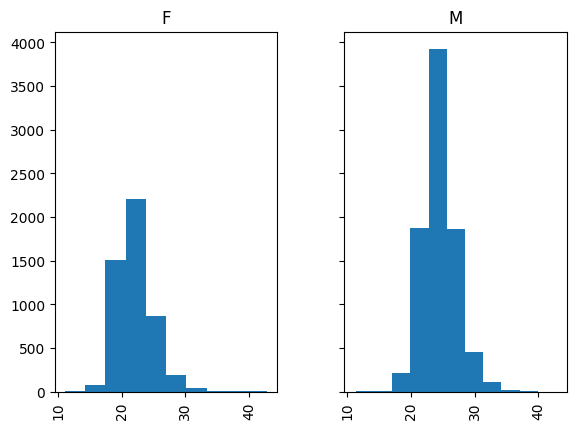

In [35]:
body_df['BMI'] = body_df.weight_kg / ((body_df.height_cm/100)**2)
body_df.hist(column='BMI', by='gender', sharex=True, sharey=True)

Both graphs show a median around 25 for the BMI, however the female BMI is slightly lower.

Additionally, the distribution of male BMI appears to close to normal, while the distribution for female BMI is slightly right skewed

### <span style="color:magenta">Q8: 12 pt: </span>
Compare the mean values of height, weight, body fat %, grip force, sit and bend forward, and sit-ups count for gender F vs. gender M.  You should use both quantitative and visual methods in your work.


The difference between the average height in Males and Females was 12.77 cm
The difference between the average weight in Males and Females was 16.67 kg
The difference between the average body fat % in Males and Females was -8.30%
The difference between the average grip force in Males and Females was 17.63


gender
F    [Axes(0.125,0.53;0.775x0.35), Axes(0.125,0.11;...
M    [Axes(0.125,0.53;0.775x0.35), Axes(0.125,0.11;...
dtype: object

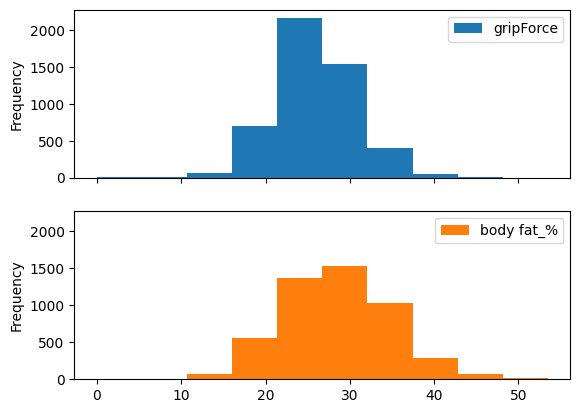

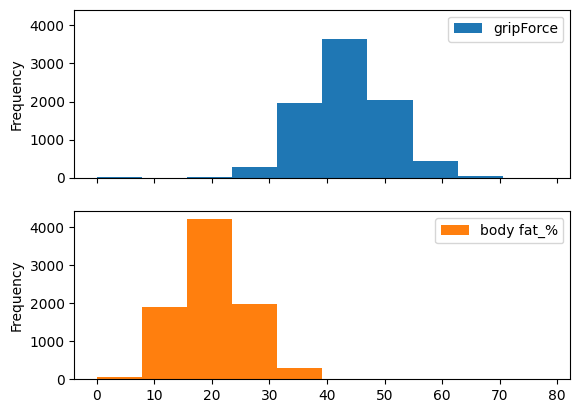

In [61]:
print(f"The difference between the average height in Males and Females was {body_df[body_df.gender == 'M'].height_cm.mean() - body_df[body_df.gender == 'F'].height_cm.mean():.2f} cm")
print(f"The difference between the average weight in Males and Females was {body_df[body_df.gender == 'M'].weight_kg.mean() - body_df[body_df.gender == 'F'].weight_kg.mean():.2f} kg")
print(f"The difference between the average body fat % in Males and Females was {body_df[body_df.gender == 'M']['body fat_%'].mean() - body_df[body_df.gender == 'F']['body fat_%'].mean():.2f}%")
print(f"The difference between the average grip force in Males and Females was {body_df[body_df.gender == 'M'].gripForce.mean() - body_df[body_df.gender == 'F'].gripForce.mean():.2f}")

body_df.groupby('gender').plot(kind='hist', y=['gripForce', 'body fat_%'], subplots=True, legend=True, sharex=True, sharey=True)


In the top graph we can see the female distributions and the second graph the males.


Only the vizualizations for grip force and body fat % were created since height and weight have previously been generated.

- The difference between the average height in Males and Females was 12.77 cm
- The difference between the average weight in Males and Females was 16.67 kg
- The difference between the average body fat % in Males and Females was -8.30%
- The difference between the average grip force in Males and Females was 17.63

### <span style="color:magenta">Q9: 18 pt: </span>
Take a look at gripForce (a measure of strength), "sit and bend forward" (a measure of flexibility), and "sit-ups count" (a measures of strength and endurance of the abdominals and hip-flexor muscles).  For each of those measures, calculate their z-scores (i.e. subtract the mean of the variable from each observation, then divide by the standard deviation of that score).  Create an overall fitness score by adding the z-scores for each of those variables together, then use `pd.qcut()` (not `pd.cut()`) to assign them to five categories ranging from lowest score to highest score.  

a) Report the number of individuals in each of the resulting categories.

b) Comment on the degree to which your categories correspond to the `class` column.

In [11]:
body_df['gripForce z-score'] = (body_df.gripForce - body_df.gripForce.mean()) / body_df.gripForce.std()
body_df['sit and bend forward_cm z-score'] = (body_df['sit and bend forward_cm'] - body_df['sit and bend forward_cm'].mean()) / body_df['sit and bend forward_cm'].std()
body_df['sit-ups counts z-score'] = (body_df['sit-ups counts'] - body_df['sit-ups counts'].mean()) / body_df['sit-ups counts'].std()
body_df['overall_fitness_score'] = body_df['gripForce z-score'] + body_df['sit and bend forward_cm z-score'] + body_df['sit-ups counts z-score']
body_df['fitness_category'] = pd.qcut(body_df.overall_fitness_score, q=5, labels=['A', 'B', 'C', 'D', 'E'])
print(body_df['fitness_category'].value_counts())
print()
print(body_df['class'].value_counts()) 

fitness_category
A    2679
C    2679
E    2679
B    2678
D    2678
Name: count, dtype: int64

class
C    3349
D    3349
A    3348
B    3347
Name: count, dtype: int64


#### Under the new fitness categories created we would see the following number of people under each catagory:
- A:    2679
- C:    2679
- E:    2679
- B:    2678
- D:    2678

Since there are now 5 categories instead of 4 there are slightly less people in each category compared to those in the original dataset

Since the categories are assigned based on quartiles the distribution of people betwen each of the categories matches that of the original dataset, with nearly similar numbers within each catagory

It is hard to assess which method of classification is better without looking at further measures

### IMPORTANT: Ensure your complete notebook runs without errors from top to bottom (check by using "Run All").

## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas